In [1]:
import pandas as pd
from sktime.forecasting.fbprophet import Prophet 
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('../data/multivariate/blow_mold_preprocessed.csv', index_col='datetime', parse_dates=['datetime'])

In [9]:
# [Double check if the datetime index is complete]

(data.index == pd.date_range(data.index[0], data.index[-1], freq='M')).sum()

276

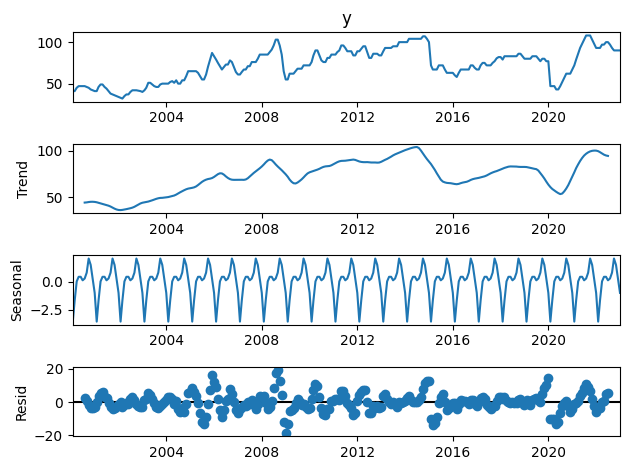

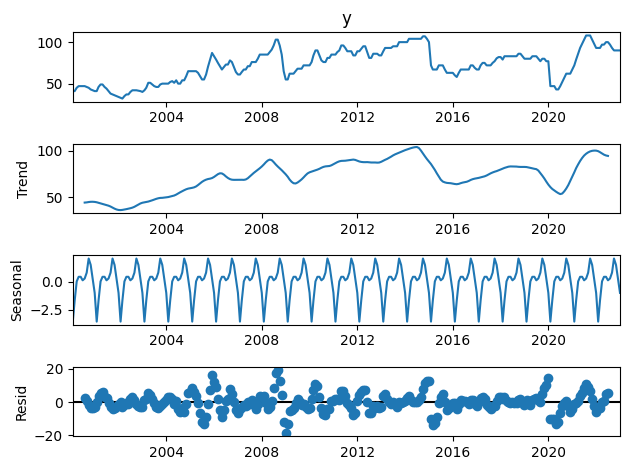

In [14]:
seasonal_decompose(data['y']).plot()

In [10]:
# [Train test split]
from sktime.forecasting.model_selection import temporal_train_test_split

train, test =temporal_train_test_split(data, test_size=24) 

fh = np.arange(1, 25)


In [11]:
forecaster = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

forecaster.fit(train)

fh = np.arange(1, 25)

y_pred_interval = forecaster.predict_interval(fh=fh, coverage=0.9)
y_pred = forecaster.predict(fh=fh)


/home/zq/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [12]:
train

y  gas_regm  m_coil_brent_eu  ppi_plastic_resins   
datetime                                                          
2000-01-31  41.0     1.289            25.51               139.4  \
2000-02-29  41.0     1.377            27.78               141.7   
2000-03-31  45.0     1.516            27.49               146.3   
2000-04-30  47.0     1.465            22.76               151.4   
2000-05-31  47.0     1.487            27.74               155.6   
...          ...       ...              ...                 ...   
2020-08-31  57.0     2.182            44.74               225.1   
2020-09-30  62.0     2.183            40.91               226.0   
2020-10-31  62.0     2.158            40.19               238.2   
2020-11-30  62.0     2.108            42.69               240.0   
2020-12-31  67.0     2.195            49.99               246.3   

            global_proce_of_rubber  ppi_nonpackaging_plastic  
datetime                                                      
2000-01-31               29.207387                     106.3  
2000-02-29               33.391099                     105.6  
2000-03-31               30.941913                     106.1  
2000-04-30               31.930148                     106.9  
2000-05-31               31.201702                     106.3  
...                            ...                       ...  
2020-08-31               79.961626                     214.3  
2020-09-30               89.312444                     220.9  
2020-10-31              101.520278                     224.0  
2020-11-30              110.151798                     222.4  
2020-12-31              107.745596                     228.4  

[252 rows x 6 columns]

In [13]:
y_pred

y  gas_regm  m_coil_brent_eu  ppi_plastic_resins   
datetime                                                               
2021-01-31  62.685334  1.903960        40.687691          227.360053  \
2021-02-28  62.989694  2.004521        42.041232          230.720288   
2021-03-31  64.360850  2.103394        42.033218          232.234552   
2021-04-30  64.314560  2.160746        41.936187          232.335731   
2021-05-31  63.628361  2.224923        42.911942          232.238510   
2021-06-30  62.875229  2.237607        42.895561          231.510672   
2021-07-31  62.856161  2.186734        43.166247          232.096364   
2021-08-31  63.389167  2.157789        42.392466          232.214874   
2021-09-30  64.497434  2.160086        40.868551          230.818127   
2021-10-31  63.889188  2.041581        38.617204          232.419301   
2021-11-30  62.461888  1.894478        35.856109          229.631777   
2021-12-31  61.125199  1.796469        34.456708          226.810793   
2022-01-31  58.698110  1.791776        34.397434          225.064329   
2022-02-28  59.832382  1.810891        34.793385          227.350714   
2022-03-31  60.973787  1.938473        35.345039          228.149835   
2022-04-30  61.003207  2.037773        36.536566          229.288947   
2022-05-31  60.553808  2.112354        36.901070          229.833779   
2022-06-30  59.812230  2.090865        36.597267          228.690398   
2022-07-31  59.619058  2.054708        36.905036          228.910360   
2022-08-31  59.771702  2.017477        35.340195          228.540738   
2022-09-30  60.998472  1.988710        34.378336          227.989386   
2022-10-31  60.526408  1.880143        32.414343          228.740552   
2022-11-30  59.594736  1.780771        30.197327          227.195789   
2022-12-31  58.444763  1.683003        28.554202          223.359073   

            global_proce_of_rubber  ppi_nonpackaging_plastic  
datetime                                                      
2021-01-31               53.775624                259.742879  
2021-02-28               57.741776                258.022503  
2021-03-31               55.231873                260.508172  
2021-04-30               56.297387                262.183009  
2021-05-31               54.856219                262.229160  
2021-06-30               51.488737                262.649328  
2021-07-31               47.694820                265.383894  
2021-08-31               44.505225                266.178068  
2021-09-30               44.036854                267.696240  
2021-10-31               41.783832                270.536547  
2021-11-30               39.779445                274.264899  
2021-12-31               41.215203                275.409212  
2022-01-31               44.484229                276.394033  
2022-02-28               48.289206                276.956695  
2022-03-31               45.012009                278.740158  
2022-04-30               46.688832                280.037818  
2022-05-31               44.720607                280.056975  
2022-06-30               42.391046                280.944455  
2022-07-31               37.938332                282.393380  
2022-08-31               34.924627                283.883950  
2022-09-30               34.036031                286.052102  
2022-10-31               32.388463                289.091358  
2022-11-30               29.776547                292.391035  
2022-12-31               31.186107                292.907592

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='y'>)

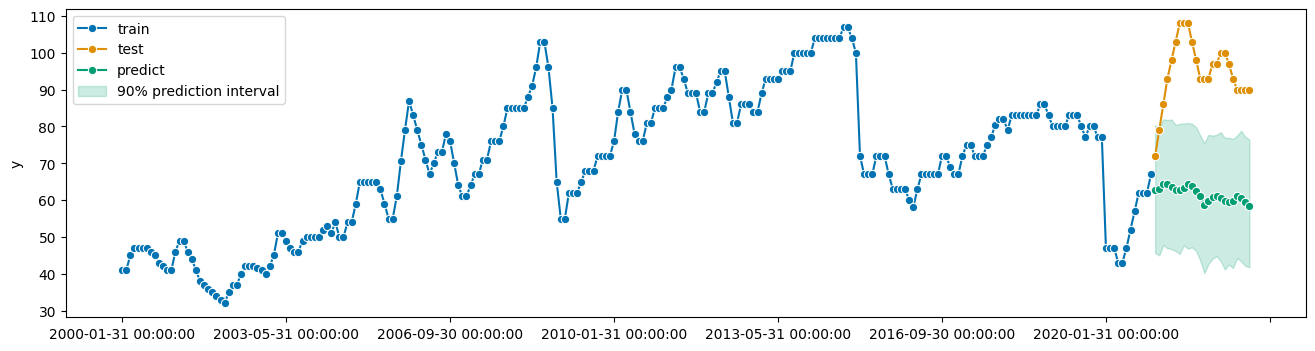

In [44]:
# [visualise result]

from sktime.utils.plotting import plot_series

plot_series(train['y'], test['y'], y_pred, labels=['train', 'test', 'predict'],pred_interval=y_pred_interval)

In [45]:
y_pred_interval

y           
                  0.9           
                lower      upper
2021-01-31  45.647389  80.332514
2021-02-28  44.996505  79.720147
2021-03-31  47.806180  81.946651
2021-04-30  46.916707  81.717843
2021-05-31  46.717285  81.897287
2021-06-30  46.155099  80.388300
2021-07-31  45.400127  80.704215
2021-08-31  47.728975  80.796491
2021-09-30  46.855388  80.944569
2021-10-31  47.166807  80.699257
2021-11-30  46.201201  79.818007
2021-12-31  43.610934  77.577151
2022-01-31  40.137022  75.430733
2022-02-28  42.660278  77.719283
2022-03-31  44.071521  77.503215
2022-04-30  44.788133  77.706937
2022-05-31  43.393452  78.458045
2022-06-30  41.190045  76.874196
2022-07-31  42.473262  76.948974
2022-08-31  41.555358  76.598085
2022-09-30  44.267910  77.547905
2022-10-31  43.333567  78.796261
2022-11-30  42.155181  77.192508
2022-12-31  41.765036  76.426520

In [72]:
y_pred_interval.columns.levels[0]

Index(['y', 'gas_regm', 'm_coil_brent_eu', 'ppi_plastic_resins',
       'global_proce_of_rubber', 'ppi_nonpackaging_plastic'],
      dtype='object')

In [80]:
interval = y_pred_interval.drop(columns=y_pred_interval.columns.levels[0].drop('y'))[['y']]

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='y'>)

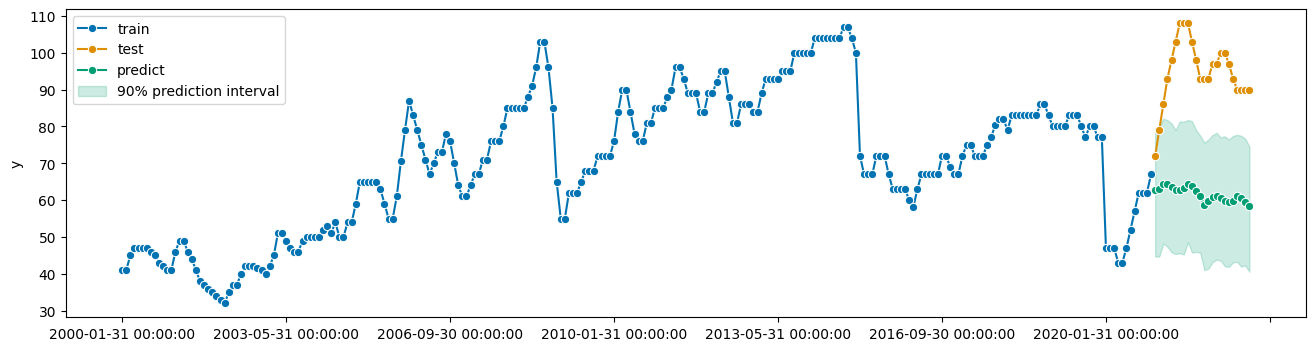

In [111]:
# [visualise result]

from sktime.utils.plotting import plot_series

plot_series(
    train['y'], 
    test['y'], 
    y_pred['y'], 
    labels=['train', 'test', 'predict'],
    pred_interval=pd.concat([y_pred_interval['y']],keys=['y'], axis=1))

In [122]:
from sklearn.neighbors import KNeighborsRegressor

from sktime.forecasting.compose import make_reduction

regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")

forecaster.fit(train['y'])

RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(n_neighbors=3),
                                     window_length=15)

In [14]:
train['y']

datetime
2000-01-31    41.0
2000-02-29    41.0
2000-03-31    45.0
2000-04-30    47.0
2000-05-31    47.0
              ... 
2020-08-31    57.0
2020-09-30    62.0
2020-10-31    62.0
2020-11-30    62.0
2020-12-31    67.0
Freq: M, Name: y, Length: 252, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='y'>)

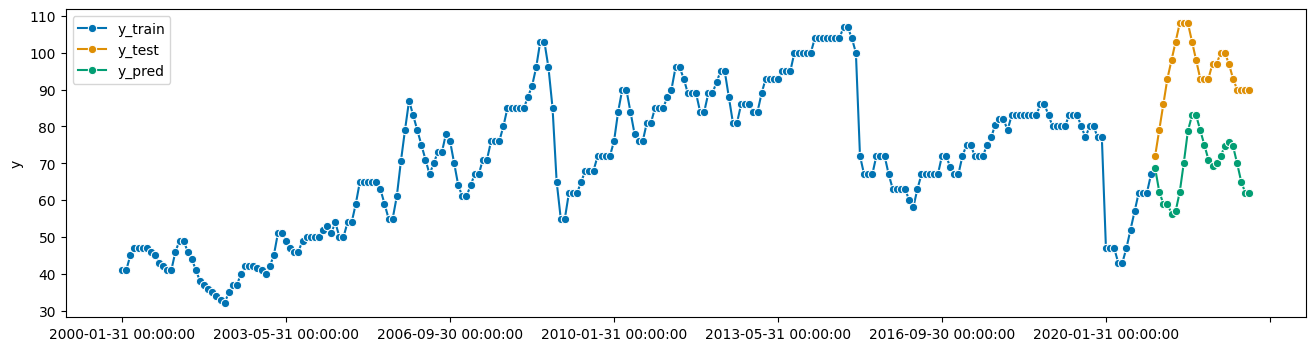

In [121]:
y_pred = forecaster.predict(fh)
# y_pred_interval = forecaster.(fh=fh, coverage=0.9)
plot_series(train['y'], test['y'], y_pred['y'], labels=["y_train", "y_test", "y_pred"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='y'>)

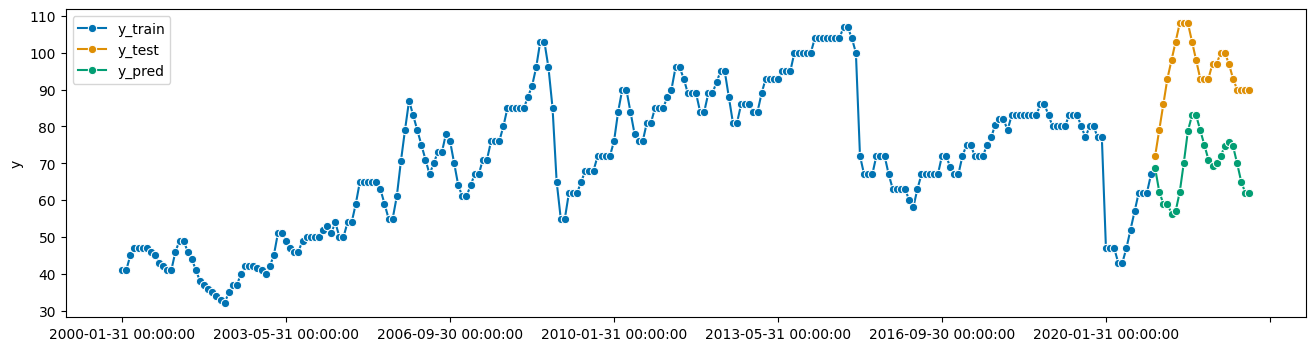

In [123]:
y_pred = forecaster.predict(fh)
# y_pred_interval = forecaster.(fh=fh, coverage=0.9)
plot_series(train['y'], test['y'], y_pred, labels=["y_train", "y_test", "y_pred"])

In [6]:
from sktime.forecasting.arima import AutoARIMA

forecaster = AutoARIMA()

forecaster.fit(train)

pred = forecaster.predict(fh=fh)

/home/zq/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/zq/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/zq/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/zq/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/zq/.local/lib/py

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='y'>)

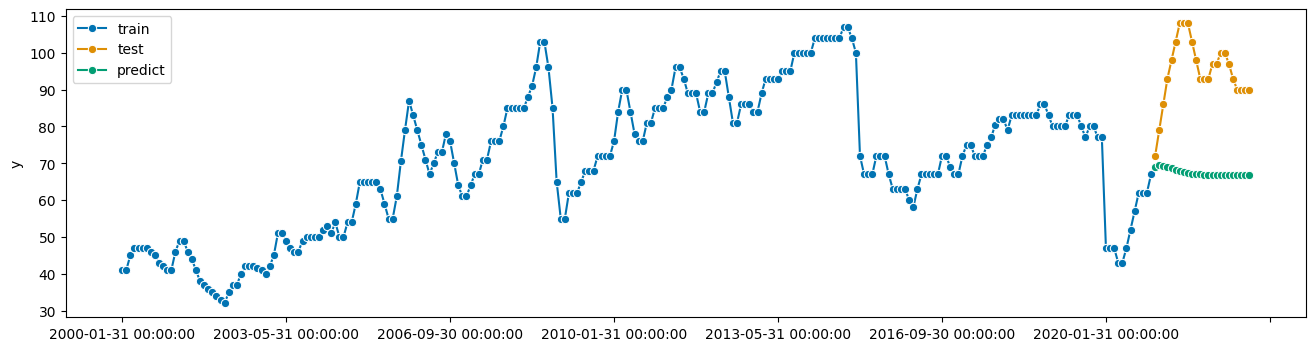

In [9]:
from sktime.utils.plotting import plot_series

plot_series(
    train['y'], 
    test['y'], 
    pred['y'], 
    labels=['train', 'test', 'predict'],
    # pred_interval=pd.concat([y_pred_interval['y']],keys=['y'], axis=1)
    )